In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint as pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180) 

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=10)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=10)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['storforshei', 'chavakkad', 'honiara', 'hobart', 'gainesville', 'svetlogorsk', 'klyuchi', 'thompson', 'rikitea', 'komsomolskiy']


In [10]:
# Save config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query url and request results
query_url = f"{url}appid={weather_api_key}&units={units}&q=" 
# Set temperature from response
temp = []
humidity = []
cloudiness = []
wind_speed = []
# Create for loop for temperatures in city list
for city in cities:    
    response = requests.get(query_url + city).json()
    temp.append(response['main']['temp'])
    humidity.append(response['main']['humidity'])
    cloudiness.append(response['clouds']['all'])
    wind_speed.append(response['wind']['speed'])
    print(f"The temperature in {city} is {temp} C.")


The temperature in storforshei is [68.77] C.
The temperature in chavakkad is [68.77, 77.07] C.
The temperature in honiara is [68.77, 77.07, 75.6] C.
The temperature in hobart is [68.77, 77.07, 75.6, 51.08] C.
The temperature in gainesville is [68.77, 77.07, 75.6, 51.08, 88.52] C.
The temperature in svetlogorsk is [68.77, 77.07, 75.6, 51.08, 88.52, 66.9] C.
The temperature in klyuchi is [68.77, 77.07, 75.6, 51.08, 88.52, 66.9, 59.25] C.
The temperature in thompson is [68.77, 77.07, 75.6, 51.08, 88.52, 66.9, 59.25, 69.96] C.
The temperature in rikitea is [68.77, 77.07, 75.6, 51.08, 88.52, 66.9, 59.25, 69.96, 73.85] C.
The temperature in komsomolskiy is [68.77, 77.07, 75.6, 51.08, 88.52, 66.9, 59.25, 69.96, 73.85, 84.88] C.


In [11]:
cities_df = pd.DataFrame({'Cities': cities, 'Latitude': lats, 'Longitude': lngs, 'Temperature': temp, 'Humidity': humidity, 'Cloudiness': cloudiness, 'Wind Speed': wind_speed})
cities_df

,Cities,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,storforshei,65.222851,14.873092,68.77,68,20,2.30
1,chavakkad,10.469536,75.849012,77.07,87,100,4.99
2,honiara,-12.574210,159.207230,75.60,90,100,7.63
3,hobart,-73.334280,145.878502,51.08,87,75,1.99
4,gainesville,29.279063,-83.062082,88.52,67,90,8.05
5,svetlogorsk,66.677396,91.531807,66.90,63,18,6.71
6,klyuchi,55.249175,160.851374,59.25,79,0,6.26
7,thompson,58.285118,-99.851513,69.96,28,20,5.75
8,rikitea,-39.935493,-139.231151,73.85,76,100,18.43
9,komsomolskiy,66.262636,171.414215,84.88,32,5,9.22


In [12]:
cities_df.to_csv("../cities_output_student.csv", encoding="utf-8", index=False) 

Text(0, 0.5, 'Temperature')

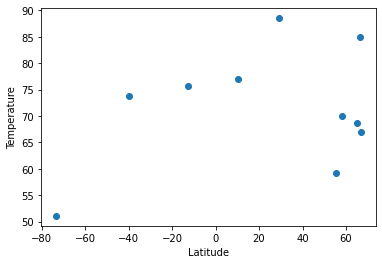

In [13]:
# Temperature (F) vs. Latitude
plt.scatter(cities_df['Latitude'], cities_df['Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Temperature ()')

In [ ]:
# Humidity (%) vs Latitude
plt.scatter(cities_df['Latitude'], cities_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')

In [ ]:
# Cloudiness (%) vs Latitude
plt.scatter(cities_df['Latitude'], cities_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

In [ ]:
# Wind Speed (mph) vs. Latitude
plt.scatter(cities_df['Latitude'], cities_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

In [ ]:
# Temperature (F) vs. Latitude
plt.scatter(cities_df['Latitude'], cities_df['Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature')

In [ ]:
x_values = cities_df.groupby['Latitude'] < 0
plt.scatter(x_values, cities_df['Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature')